In [ ]:
# Import modules and packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

ModuleNotFoundError: No module named 'keras'

In [ ]:
# Importing Training Set
file_name = 'classico_no_frill_on.csv'
sales_file_name = str(os.path.join(os.getcwd(), file_name))
dataset_train = pd.read_csv(sales_file_name)

dataset_train = dataset_train.fillna(0)
dataset_train = dataset_train.drop_duplicates()
dataset_train.columns = [x.lower() for x in dataset_train.columns]

#dataset_train.fscl_wk_end_dt = pd.to_datetime(dataset_train['fscl_wk_end_dt'], format='%Y-%m-%d')
dataset_train.index = dataset_train.fscl_wk_end_dt

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:6]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['fscl_wk_end_dt'])

datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))


Training set shape == (199, 6)
All timestamps == 199
Featured selected: ['banner_ppg_total_sales_units', 'banner_ppg_avg_unit_price', 'promo_factor', 'pandemic_severity_flag', 'season_flag']


In [ ]:
dataset_train

,fscl_wk_end_dt,banner_ppg_total_sales_units,banner_ppg_avg_unit_price,promo_factor,pandemic_severity_flag,season_flag
fscl_wk_end_dt,,,,,,
2017-01-07,2017-01-07,964,7.447469,0.000000,1,2
2017-01-14,2017-01-14,927,7.447929,0.000000,1,2
2017-01-21,2017-01-21,470,7.436809,0.000000,1,2
2017-01-28,2017-01-28,570,7.389140,0.000000,1,2
2017-02-04,2017-02-04,7944,3.992335,0.865557,1,2
...,...,...,...,...,...,...
2020-09-26,2020-09-26,1053,6.453913,0.000000,2,3
2020-10-03,2020-10-03,17475,2.989914,1.180330,2,3
2020-10-10,2020-10-10,1280,6.035719,0.000000,2,3


In [ ]:
dataset_train.corr()

,banner_ppg_total_sales_units,banner_ppg_avg_unit_price,promo_factor,pandemic_severity_flag,season_flag
banner_ppg_total_sales_units,1.000000,-0.776934,0.856732,0.026369,-0.003716
banner_ppg_avg_unit_price,-0.776934,1.000000,-0.951108,-0.000331,-0.186154
promo_factor,0.856732,-0.951108,1.000000,-0.083459,0.111203
pandemic_severity_flag,0.026369,-0.000331,-0.083459,1.000000,0.141937
season_flag,-0.003716,-0.186154,0.111203,0.141937,1.000000


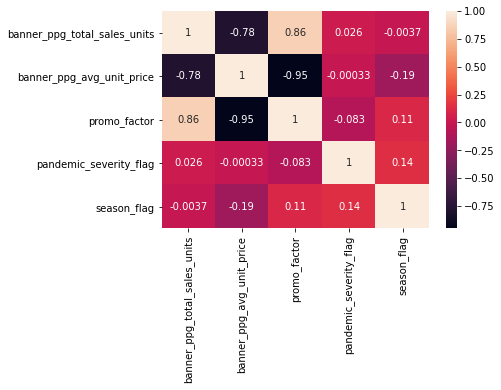

In [ ]:
sns.heatmap(dataset_train.corr(), annot=True)

In [ ]:
dataset_train.columns

Index(['fscl_wk_end_dt', 'banner_ppg_total_sales_units',
       'banner_ppg_avg_unit_price', 'promo_factor', 'pandemic_severity_flag',
       'season_flag'],
      dtype='object')

In [ ]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.values

print('Shape of training set == {}.'.format(training_set.shape))
training_set


Shape of training set == (199, 5).


array([[9.64000000e+02, 7.44746888e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [9.27000000e+02, 7.44792880e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [4.70000000e+02, 7.43680851e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [5.70000000e+02, 7.38914035e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [7.94400000e+03, 3.99233510e+00, 8.65557030e-01, 1.00000000e+00,
        2.00000000e+00],
       [8.87000000e+02, 6.64112740e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [6.41000000e+02, 6.84648986e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [3.26000000e+02, 7.27987730e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [5.62000000e+02, 7.30761566e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [6.27000000e+02, 7.41344498e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [7.58000000e+02, 7.3448

In [ ]:
dataset_train

,banner_ppg_total_sales_units,banner_ppg_avg_unit_price,promo_factor,pandemic_severity_flag,season_flag
fscl_wk_end_dt,,,,,
2017-01-07,964.0,7.447469,0.000000,1.0,2.0
2017-01-14,927.0,7.447929,0.000000,1.0,2.0
2017-01-21,470.0,7.436809,0.000000,1.0,2.0
2017-01-28,570.0,7.389140,0.000000,1.0,2.0
2017-02-04,7944.0,3.992335,0.865557,1.0,2.0
...,...,...,...,...,...
2020-09-26,1053.0,6.453913,0.000000,2.0,3.0
2020-10-03,17475.0,2.989914,1.180330,2.0,3.0
2020-10-10,1280.0,6.035719,0.000000,2.0,3.0


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-2.74215982e-01],
       [-2.85140408e-01],
       [-4.20071822e-01],
       [-3.90546349e-01],
       [ 1.78666208e+00],
       [-2.96950597e-01],
       [-3.69583262e-01],
       [-4.62588504e-01],
       [-3.92908387e-01],
       [-3.73716829e-01],
       [-3.35038458e-01],
       [ 2.02227536e+00],
       [-3.88774820e-01],
       [-3.02855692e-01],
       [-3.44486610e-01],
       [-3.89365330e-01],
       [-3.50096450e-01],
       [ 6.17680476e+00],
       [ 1.36592408e+00],
       [ 1.00276075e+00],
       [ 6.54064911e-01],
       [ 5.77889188e-01],
       [ 4.68644936e-01],
       [ 1.04173438e+00],
       [-7.31475065e-02],
       [-7.34427612e-02],
       [-2.51776622e-01],
       [-2.84254643e-01],
       [-3.11122824e-01],
       [-3.05512984e-01],
       [-2.93998050e-01],
       [-2.91340757e-01],
       [-3.35038458e-01],
       [-3.40057789e-01],
       [-3.53639507e-01],
       [-3.22342504e-01],
       [-3.74602593e-01],
       [ 1.74325963e+00],
       [-2.3

In [ ]:
len(training_set_scaled)

199

In [ ]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 13   # Number of days we want top predict into the future
n_past = 13     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (174, 13, 4).
y_train shape == (174, 1).


In [ ]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
#model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

#history = model.fit(X_train, y_train, shuffle=True, epochs=200, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)
history = model.fit(X_train, y_train, shuffle=True, epochs=200, validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/200
1/1 [==============================] - 1s 565ms/step - loss: 0.5428 - val_loss: 1.9532
Epoch 2/200
1/1 [==============================] - 0s 18ms/step - loss: 0.5602 - val_loss: 1.9305
Epoch 3/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5290 - val_loss: 1.9247
Epoch 4/200
1/1 [==============================] - 0s 22ms/step - loss: 0.5295 - val_loss: 1.9286
Epoch 5/200
1/1 [==============================] - 0s 18ms/step - loss: 0.5251 - val_loss: 1.9372
Epoch 6/200
1/1 [==============================] - 0s 25ms/step - loss: 0.5156 - val_loss: 1.9421
Epoch 7/200
1/1 [==============================] - 0s 21ms/step - loss: 0.5083 - val_loss: 1.9704
Epoch 8/200
1/1 [==============================] - 0s 29ms/step - loss: 0.5237 - val_loss: 1.9563
Epoch 9/200
1/1 [==============================] - 0s 18ms/step - loss: 0.5553 - val_loss: 1.9551
Epoch 10/200
1/1 [==============================] - 0s 25ms/step - loss: 0.5053 - val_loss: 1.9694
Epoch 11/200
1/1 [

Epoch 84/200
1/1 [==============================] - 0s 24ms/step - loss: 0.1892 - val_loss: 2.0860
Epoch 85/200
1/1 [==============================] - 0s 22ms/step - loss: 0.1828 - val_loss: 2.0817
Epoch 86/200
1/1 [==============================] - 0s 20ms/step - loss: 0.1764 - val_loss: 2.0810
Epoch 87/200
1/1 [==============================] - 0s 19ms/step - loss: 0.1744 - val_loss: 2.0798
Epoch 88/200
1/1 [==============================] - 0s 23ms/step - loss: 0.1689 - val_loss: 2.0794
Epoch 89/200
1/1 [==============================] - 0s 20ms/step - loss: 0.1634 - val_loss: 2.0817
Epoch 90/200
1/1 [==============================] - 0s 19ms/step - loss: 0.1586 - val_loss: 2.0876
Epoch 91/200
1/1 [==============================] - 0s 22ms/step - loss: 0.1507 - val_loss: 2.0961
Epoch 92/200
1/1 [==============================] - 0s 27ms/step - loss: 0.1436 - val_loss: 2.1045
Epoch 93/200
1/1 [==============================] - 0s 23ms/step - loss: 0.1378 - val_loss: 2.1123
Epoch 94/2

1/1 [==============================] - 0s 31ms/step - loss: 0.0072 - val_loss: 2.1764
Epoch 167/200
1/1 [==============================] - 0s 25ms/step - loss: 0.0072 - val_loss: 2.1731
Epoch 168/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0071 - val_loss: 2.1743
Epoch 169/200
1/1 [==============================] - 0s 19ms/step - loss: 0.0071 - val_loss: 2.1782
Epoch 170/200
1/1 [==============================] - 0s 20ms/step - loss: 0.0070 - val_loss: 2.1766
Epoch 171/200
1/1 [==============================] - 0s 20ms/step - loss: 0.0070 - val_loss: 2.1741
Epoch 172/200
1/1 [==============================] - 0s 20ms/step - loss: 0.0070 - val_loss: 2.1758
Epoch 173/200
1/1 [==============================] - 0s 18ms/step - loss: 0.0069 - val_loss: 2.1759
Epoch 174/200
1/1 [==============================] - 0s 20ms/step - loss: 0.0068 - val_loss: 2.1752
Epoch 175/200
1/1 [==============================] - 0s 19ms/step - loss: 0.0068 - val_loss: 2.1774
Epoch 176/200


In [ ]:

# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='7d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [ ]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['predicted_sales_units']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['predicted_sales_units']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,predicted_sales_units
2017-09-30,1121.492065
2017-10-07,921.485840
2017-10-14,843.317932


In [ ]:
PREDICTION_TRAIN

,predicted_sales_units
2017-09-30,1121.492065
2017-10-07,921.485840
2017-10-14,843.317932
2017-10-21,860.870300
2017-10-28,7069.653809
...,...
2020-09-26,8815.791016
2020-10-03,8948.214844
2020-10-10,7205.103027
2020-10-17,5584.330566


In [ ]:
dataset_train.index

DatetimeIndex(['2017-01-07', '2017-01-14', '2017-01-21', '2017-01-28',
               '2017-02-04', '2017-02-11', '2017-02-18', '2017-02-25',
               '2017-03-04', '2017-03-11',
               ...
               '2020-08-22', '2020-08-29', '2020-09-05', '2020-09-12',
               '2020-09-19', '2020-09-26', '2020-10-03', '2020-10-10',
               '2020-10-17', '2020-10-24'],
              dtype='datetime64[ns]', name='fscl_wk_end_dt', length=199, freq=None)

In [ ]:
PREDICTIONS_FUTURE.index

DatetimeIndex(['2020-10-24', '2020-10-31', '2020-11-07', '2020-11-14',
               '2020-11-21', '2020-11-28', '2020-12-05', '2020-12-12',
               '2020-12-19', '2020-12-26', '2021-01-02', '2021-01-09',
               '2021-01-16'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dataset_train.index = pd.DatetimeIndex(dataset_train.index)

In [ ]:
dataset_train.index

DatetimeIndex(['2017-01-07', '2017-01-14', '2017-01-21', '2017-01-28',
               '2017-02-04', '2017-02-11', '2017-02-18', '2017-02-25',
               '2017-03-04', '2017-03-11',
               ...
               '2020-08-22', '2020-08-29', '2020-09-05', '2020-09-12',
               '2020-09-19', '2020-09-26', '2020-10-03', '2020-10-10',
               '2020-10-17', '2020-10-24'],
              dtype='datetime64[ns]', name='fscl_wk_end_dt', length=199, freq=None)

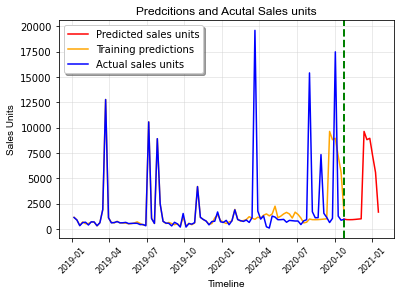

In [ ]:
# Set plot size 
#from pylab import rcParams
#rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2019-01-01'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['predicted_sales_units'], color='r', label='Predicted sales units')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['predicted_sales_units'], color='orange', label='Training predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['banner_ppg_total_sales_units'], color='b', label='Actual sales units')
#plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['banner_ppg_total_sales_units'], color='b', label='River plan sales units')
plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Sales units', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Sales Units', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

plt.show()

In [ ]:
PREDICTION_TRAIN

,predicted_sales_units
2017-09-30,1121.492065
2017-10-07,921.485840
2017-10-14,843.317932
2017-10-21,860.870300
2017-10-28,7069.653809
...,...
2020-09-26,8815.791016
2020-10-03,8948.214844
2020-10-10,7205.103027
2020-10-17,5584.330566


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

metric_df = PREDICTION_TRAIN[['predicted_sales_units']].join(dataset_train[['banner_ppg_total_sales_units']], how = 'inner')
metric_df.dropna(inplace=True)
mse = mean_squared_error(metric_df.predicted_sales_units, metric_df.banner_ppg_total_sales_units)
r2 = r2_score(metric_df.predicted_sales_units, metric_df.banner_ppg_total_sales_units)
mae = mean_absolute_error(metric_df.predicted_sales_units, metric_df.banner_ppg_total_sales_units)
mape = mean_absolute_percentage_error(metric_df.predicted_sales_units, metric_df.banner_ppg_total_sales_units)

print('The MSE is {}'. format(mse))
print('The RMSE is {}'. format(sqrt(mse)))
#print('The R2 is {}'. format(r2))
print('The MAE is {}'. format(mae))
print('The MAPE is {}'. format(mape))


The MSE is 5504029.223180933
The RMSE is 2346.0667559089047
The MAE is 643.4901051017808
The MAPE is 46.8737199397108


In [ ]:
PREDICTION_TRAIN.index.min(), PREDICTION_TRAIN.index.max()

(Timestamp('2017-09-30 00:00:00'), Timestamp('2020-10-24 00:00:00'))

In [ ]:
PREDICTION_TRAIN.columns

Index(['predicted_sales_units'], dtype='object')

In [ ]:
metric_df

,predicted_sales_units,banner_ppg_total_sales_units
2017-09-30,1121.492065,1109.0
2017-10-07,921.485840,938.0
2017-10-14,843.317932,824.0
2017-10-21,860.870300,863.0
2017-10-28,7069.653809,7055.0
...,...,...
2020-09-26,8815.791016,1053.0
2020-10-03,8948.214844,17475.0
2020-10-10,7205.103027,1280.0
2020-10-17,5584.330566,873.0


In [ ]:
metric_df.to_csv('lstm_output_actual_vs_predicted.csv')

In [ ]:
# Read data for banner CA6000877, prod category -26(KD), ppg_id 026002803375UI4
file_name = 'CA6000877_026002803375UI4.csv'
sales_file_name = str(os.path.join(os.getcwd(), file_name))
#sales_file_name = str(os.path.join(os.getcwd(), "CA6000988_026_ON.csv"))

df = pd.read_csv(sales_file_name)

df = df.fillna(0)
df = df.drop_duplicates()
df.columns = [x.lower() for x in df.columns]

mse_old = mean_squared_error(df.banner_ppg_total_sales_units, df.river_plan_sales_units)
mae_old = mean_absolute_error(df.banner_ppg_total_sales_units, df.river_plan_sales_units)
mape_old = mean_absolute_percentage_error(df.banner_ppg_total_sales_units, df.river_plan_sales_units)
print('The MSE is {}'. format(mse_old))
print('The RMSE is {}'. format(sqrt(mse_old)))
print('The MAE is {}'. format(mae_old))
print('The MAPE is {}'. format(mape_old))

The MSE is 8240990.718592965
The RMSE is 2870.7125802826317
The MAE is 796.3366834170854
The MAPE is 45.67732382012793
